In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
data = pd.read_csv('Combined_Intensities.csv')

In [4]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]

In [5]:
X_train, X_temp, Y_train, Y_temp = train_test_split(spectra, label, test_size= 0.5, random_state= 69, stratify= label)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size= 0.5, random_state= 69, stratify = Y_temp)

In [6]:
randoForest = RandomForestClassifier(n_estimators= 100, random_state= 69)
randoForest.fit(X_train,Y_train)

RandomForestClassifier(random_state=69)

In [7]:
validation_predict = randoForest.predict(X_val)
validation_proba = randoForest.predict_proba(X_val)

label_indices = [list(randoForest.classes_).index(label) for label in validation_predict]
predicted_val_proba = [validation_proba[i, label_idx] for i, label_idx in enumerate(label_indices)]

print(classification_report(Y_val,validation_predict))
print("Accuracy", accuracy_score(Y_val, validation_predict))

               precision    recall  f1-score   support

P. aeruginosa       0.99      0.99      0.99       375
   S. aureus        0.99      0.99      0.99       375

     accuracy                           0.99       750
    macro avg       0.99      0.99      0.99       750
 weighted avg       0.99      0.99      0.99       750

Accuracy 0.9893333333333333


In [8]:
test_predict =randoForest.predict(X_test)

print(classification_report(Y_test,test_predict))
print("Accuracy", accuracy_score(Y_test, test_predict))

               precision    recall  f1-score   support

P. aeruginosa       0.99      1.00      0.99       375
   S. aureus        1.00      0.99      0.99       375

     accuracy                           0.99       750
    macro avg       0.99      0.99      0.99       750
 weighted avg       0.99      0.99      0.99       750

Accuracy 0.9933333333333333


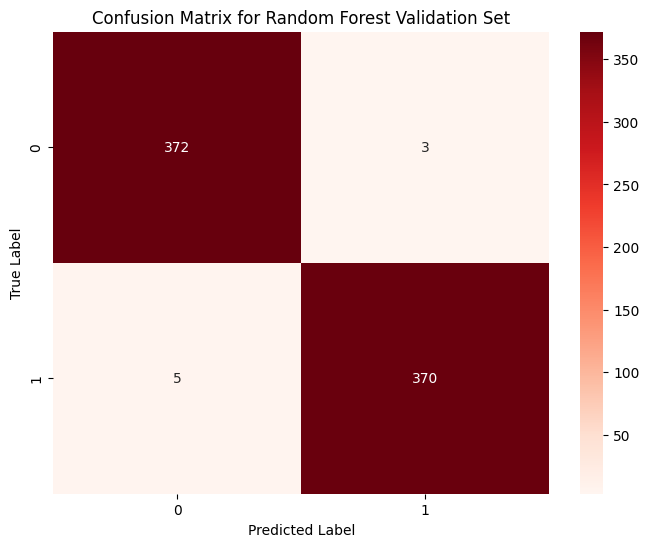

In [9]:
results_df = pd.DataFrame({'Predicted Label': validation_predict, 'Probability of Predicted Label': predicted_val_proba, 'True Label': Y_val})

true_labels = results_df["True Label"]
predicted_labels = results_df['Predicted Label']

confusionMatrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))

sns.heatmap(confusionMatrix, annot= True, fmt ="d", cmap="Reds")

plt.title('Confusion Matrix for Random Forest Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [10]:
unique_labels = np.unique(np.concatenate((true_labels, predicted_labels)))
print("Order of labels in the confusion matrix:", unique_labels)

Order of labels in the confusion matrix: ['P. aeruginosa' 'S. aureus ']


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
#unlabeledData = pd.read_csv('Combined_Intensities_Unlabeled.csv')
labelData = pd.read_csv('Combined_Intensities.csv')

labels = labelData.iloc[:,-1]

In [13]:
pca = PCA(n_components=2)
reducedData = pca.fit_transform(unlabeledData)

NameError: name 'unlabeledData' is not defined

In [ ]:
kmeans = KMeans(n_clusters= 2, random_state= 69)
cluster_labels = kmeans.fit_predict(reducedData)

c:\Users\elfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['P. aeruginosa' 'S. aureus ']


<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\elfo\AppData\Local\Temp\ipykernel_35944\3310443431.py:13: SyntaxWarning: invalid escape sequence '\i'
  legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'$\it{{{label}}}$') for color, label in zip(colors, unique)]


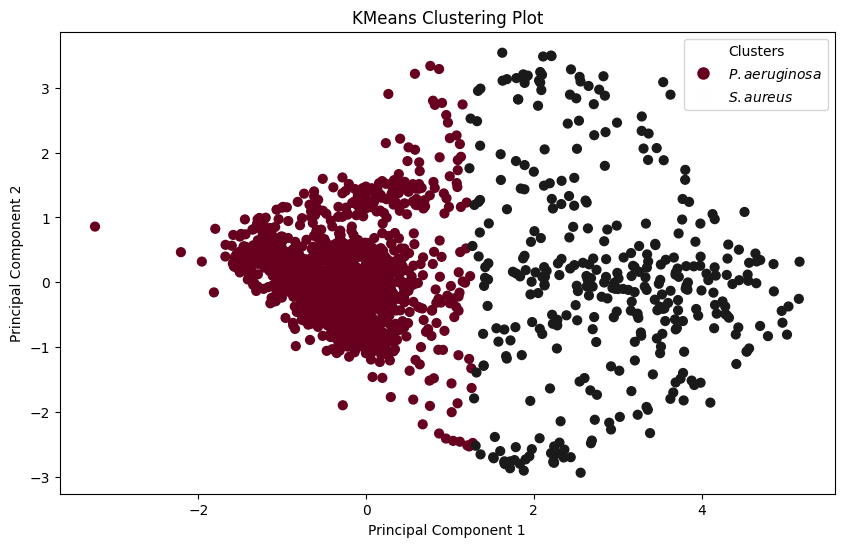

In [ ]:
unique = labels.unique()
print(unique)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reducedData[:, 0], reducedData[:, 1], c=cluster_labels, cmap='RdGy', marker='o',  s=40, alpha=1)
plt.title('KMeans Clustering Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

cmap = plt.get_cmap('RdGy')
colors = [cmap(i / len(unique)) for i in range(len(unique))]

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'$\it{{{label}}}$') for color, label in zip(colors, unique)]
plt.legend(handles=legend_handles, title="Clusters")
plt.show()

In [14]:
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
dataset_pca = pd.DataFrame(abs(pca.components_), index = ['PC1', 'PC2'] )


print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.095].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.095].iloc[1]).dropna())

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

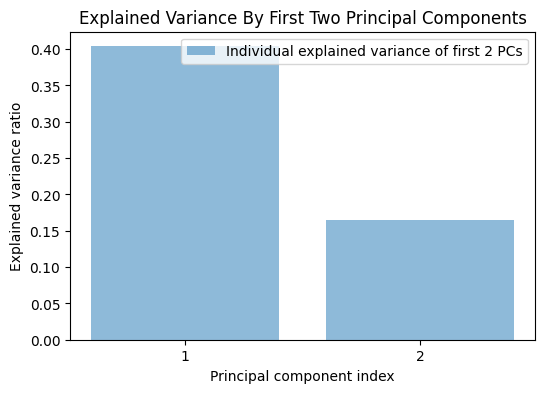

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(1, 3), pca.explained_variance_ratio_[:2], alpha=0.5, align='center', label='Individual explained variance of first 2 PCs')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks([1, 2])  # Show ticks only for the first two components
plt.legend(loc='best')
plt.title('Explained Variance By First Two Principal Components')
plt.show()

In [15]:
MixedData = pd.read_csv('10_Staph_90_PAO_Intensities.csv')

In [17]:
randoForestDual = RandomForestClassifier(n_estimators= 100, random_state= 69)
randoForestDual.fit(spectra,labels)
randoForestDual.predict_proba(MixedData)



#Data im predicting are spetral signals from a mixture sample of Staph and Pseodomonas --> ITS ONLY PREDICTING STAPH

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.7 , 0.3 ],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [0.93, 0.07],
       [0.88, 0.12],
       [0.95, 0.05],
       [0.79, 0.21],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.91, 0.09],
       [0.92, 0.08],
       [0.75, 0.25],
       [0.81, 0.19],
       [0.91, 0.09],
       [0.96, 0.04],
       [0.76, 0.24]])

In [18]:
MixedData = pd.read_csv('30_Staph_70_PAO_Intensities.csv')
randoForestDual.predict_proba(MixedData)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.93, 0.07],
       [0.79, 0.21],
       [0.87, 0.13],
       [0.92, 0.08],
       [0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.5 , 0.5 ],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.64, 0.36],
       [0.84, 0.16],
       [0.86, 0.14],
       [0.73, 0.27],
       [0.94, 0.06],
       [0.77, 0.23],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.93, 0.07],
       [0.7 , 0.3 ],
       [0.78, 0.22],
       [0.94, 0.06],
       [0.96, 0.04],
       [0.63, 0.37]])

In [19]:
MixedData = pd.read_csv('50_Staph_50_PAO_Intensities.csv')
randoForestDual.predict_proba(MixedData)

array([[0.89, 0.11],
       [0.9 , 0.1 ],
       [0.65, 0.35],
       [0.53, 0.47],
       [0.66, 0.34],
       [0.33, 0.67],
       [0.74, 0.26],
       [0.46, 0.54],
       [0.28, 0.72],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.73, 0.27],
       [0.67, 0.33],
       [0.65, 0.35],
       [0.87, 0.13],
       [0.99, 0.01],
       [0.62, 0.38],
       [0.52, 0.48],
       [0.34, 0.66],
       [0.37, 0.63],
       [0.26, 0.74],
       [0.23, 0.77],
       [0.26, 0.74],
       [0.39, 0.61],
       [0.53, 0.47],
       [0.28, 0.72],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.91, 0.09],
       [0.61, 0.39],
       [0.71, 0.29],
       [0.76, 0.24],
       [0.84, 0.16],
       [0.99, 0.01],
       [0.37, 0.63]])

In [20]:
MixedData = pd.read_csv('70_Staph_30_PAO_Intensities.csv')
randoForestDual.predict_proba(MixedData)

array([[0.59, 0.41],
       [0.47, 0.53],
       [0.7 , 0.3 ],
       [0.37, 0.63],
       [0.31, 0.69],
       [0.29, 0.71],
       [0.35, 0.65],
       [0.26, 0.74],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.89, 0.11],
       [0.96, 0.04],
       [0.53, 0.47],
       [0.45, 0.55],
       [0.69, 0.31],
       [0.56, 0.44],
       [0.68, 0.32],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.84, 0.16],
       [0.08, 0.92],
       [0.58, 0.42],
       [0.47, 0.53],
       [0.08, 0.92],
       [0.91, 0.09],
       [0.88, 0.12],
       [0.12, 0.88],
       [0.99, 0.01],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.99, 0.01],
       [0.84, 0.16],
       [0.73, 0.27],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.51, 0.49]])

In [21]:
MixedData = pd.read_csv('90_Staph_10_PAO_Intensities.csv')
randoForestDual.predict_proba(MixedData)

array([[0.66, 0.34],
       [0.66, 0.34],
       [0.2 , 0.8 ],
       [0.45, 0.55],
       [0.22, 0.78],
       [0.15, 0.85],
       [0.63, 0.37],
       [0.7 , 0.3 ],
       [0.21, 0.79],
       [0.11, 0.89],
       [0.06, 0.94],
       [0.01, 0.99],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.17, 0.83],
       [0.56, 0.44],
       [0.11, 0.89],
       [0.04, 0.96],
       [0.07, 0.93],
       [0.22, 0.78],
       [0.33, 0.67],
       [0.01, 0.99],
       [0.09, 0.91],
       [0.11, 0.89],
       [0.13, 0.87],
       [0.32, 0.68],
       [0.83, 0.17],
       [0.57, 0.43],
       [0.02, 0.98],
       [0.79, 0.21],
       [0.32, 0.68],
       [0.03, 0.97],
       [0.79, 0.21],
       [0.39, 0.61],
       [0.03, 0.97]])

In [22]:
multilabelData = pd.read_csv('Combined_Intensities_Multilabel.csv')

In [23]:
spectra = multilabelData.iloc[:, :-2]
labels = multilabelData.iloc[:, -2:]

labels

,P. aeruginosa,S. aureus
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2995,0,1
2996,0,1
2997,0,1
2998,0,1


In [24]:
randoForestMultiLabel = RandomForestClassifier(n_estimators= 100, random_state= 69)
randoForestMultiLabel.fit(spectra,labels)

RandomForestClassifier(random_state=69)

In [26]:
MixedData = pd.read_csv('50_Staph_50_PAO_Intensities.csv')
randoForestMultiLabel.predict(MixedData)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=int64)

In [29]:
from sklearn.multioutput import MultiOutputClassifier

mlt = MultiOutputClassifier(RandomForestClassifier(n_estimators=100,random_state=1))

mlt.fit(spectra,labels)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1))

In [30]:
mlt.predict(MixedData)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=int64)